<h1 style = 'color:blue; text-align:center;'> Using Google Trends API for Python</h1>

<img src = 'Google.jpg' width = '1200' height = '500'>

<p style = "text-align:justify;">Google has set up a website that analyzes and lists the popular search results on Google search based on various regions, location and languages. <a href = 'https://trends.google.com/trends/?geo=NG'>Google Trends</a> is a website that enables you discover what the world is searching, with the help of this notebook, you can get the trending results and many more from Google trend website using Python. This is easily done with the Python API called <a href = "https://pypi.org/project/pytrends/">pytrends</a></p>.We need to install the library using the pip install command as shown below: 

In [1]:
#pip install pytrends

<h3>Connecting to Google</h3>
<p style = 'text-align:justify'>We must connect to Google first, because we are requesting the Google trending topics from Google Trends. For this, we need to import the method called TrendReq from pytrends.request library. Also, I will import the pandas library to store and visualize the data.</p>


In [7]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
trends = TrendReq()

<h3>Interest By Region</h3>
<p style = 'text-align:justify'>Let us see the terms which are popular in the region worldwide. I am going to search for a very interesting and popular concept in the Manufacturing and Construction World called <a href = https://en.wikipedia.org/wiki/Digital_twin>Digital Twin</a>.

In [59]:
trends.build_payload(kw_list = ["Digital Twin"])
data = trends.interest_by_region()
data = data.sort_values(by = ["Digital Twin"], ascending = False)
data = pd.DataFrame(data)
data = data.head(10)
data



,Digital Twin
geoName,
Singapore,100
South Korea,83
China,74
Norway,61
Hong Kong,46
Finland,42
Netherlands,38
Switzerland,38
Australia,36


The values are calculated on a scale from 0 to 100, where 100 is the location with the most popularity as a fraction of the total searches in that location. The country with the highest search of `Digital Twin` is **Signapore** and the least is the **United Kingdom (UK)**. Infact, all the countries on the list are majorly a combination of developed Asian and European Countries.

We are going to plot the result on a bar chart so that it might give a clearer picture.

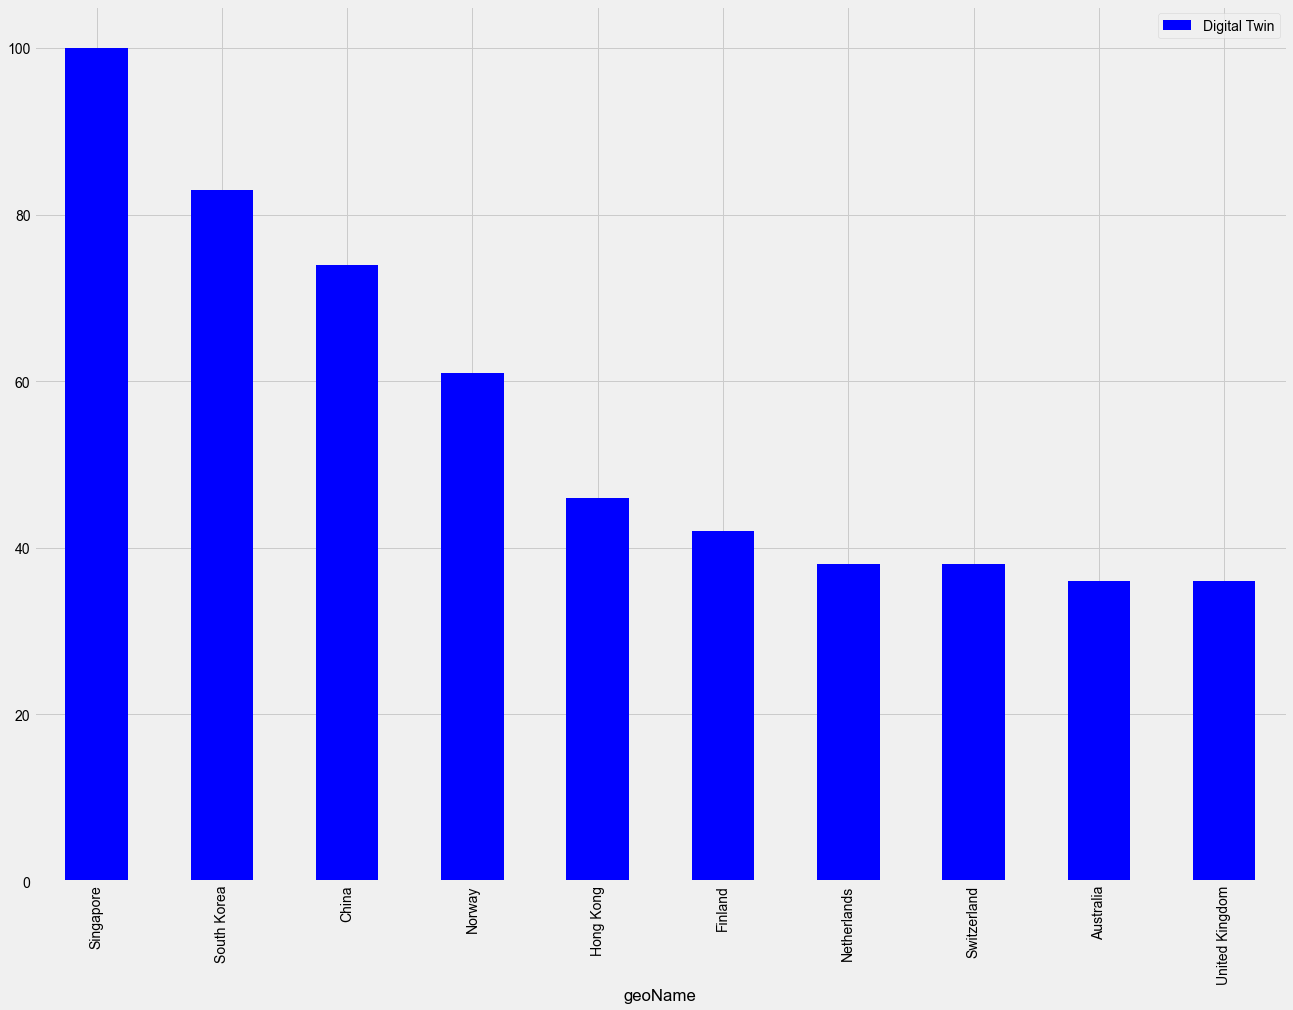

In [60]:
data.reset_index().plot(x = "geoName", y = "Digital Twin",color= "blue", figsize=(20,15),kind = "bar")
plt.style.use('seaborn')
plt.show()

<h3>Interest Over Time</h3>

We can also search for a terms trend over time using the `.interest_over_time()` method as shown below and we would also visualize this utilizing a line plot as shown below.

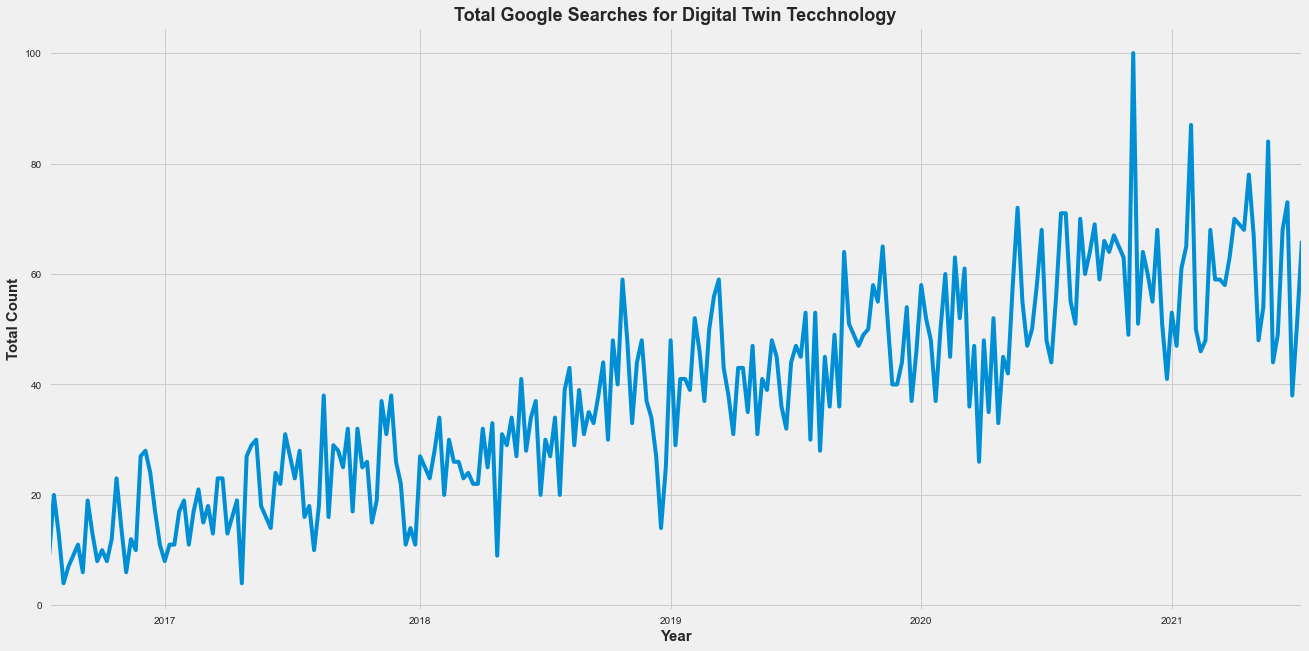

In [67]:
data = TrendReq(hl = 'en-US', tz = 360)
data.build_payload(kw_list=['Digital Twin'])
data = data.interest_over_time()
fig, ax = plt.subplots(figsize=(20,10))
data["Digital Twin"].plot()
plt.style.use('fivethirtyeight')
plt.title('Total Google Searches for Digital Twin Tecchnology', fontsize = 18, fontweight = "bold")
plt.xlabel("Year", fontsize=15, weight='bold')
plt.ylabel("Total Count", fontsize=15, weight='bold')
plt.show()

<h3>Daily Search Trends</h3>
<p style =  'text-align:justify'>Now let us get the top daily search trends worldwide. To do this we have to use the trending_searches() method. if you want to search worldwide just don't any parameter. I am going to search for trends in my home country, Nigeria.

In [11]:
dax = trends.trending_searches(pn='nigeria')
dax.head(10)

,0
0,Big Brother Naija 2021
1,NYSC
2,Bayern vs Ajax
3,James Ibori
4,Election in Lagos
5,The Voice Nigeria
6,Ladipoe
7,Burton vs Leicester City
8,Arsenal vs Millwall
9,QPR vs Man United


<p style = 'text-align:justify;'>From the table, the top trending topic in the Country is Big Brother Naija 2021 (Sigh!!, Well I couldn't be any surprised) and other topics I am aware of is the Election in Lagos, the elections took place today for all Local Governments in Lagos State. Finally, I am a Manchester United fan, and I am aware of the friendly match against Queens Park Ranger (QPR), sadly we lost the game. Well I am not surprised the Football games are trending in Nigeria. Nigeria has one of the Biggest Football fan base and the country is literally stacked with Sport Betting Companies, this might be another factor for the trend.</p>

In [20]:
day = trends.trending_searches(pn='united_states')
day.head(10)

,0
0,USWNT
1,Logan Mailloux
2,Mexico vs Honduras
3,Mike Mitchell
4,U.S. women's soccer team
5,R. Kelly
6,Cam Atkinson
7,Katie Ledecky
8,QPR vs Man United
9,Alex Morgan


In [24]:
#dab = trends.today_searches(pn='canada')
#dab.head(10)

<h3>Top Charts</h3>

<p style = "text-align:justify">Let us see what was trending in 2020 (I would be shocked if I don't see Corona Virus on the list!!) with the help of top_charts method we can get the top trending searches yearly.</p>

In [28]:
dat = trends.top_charts(2020, hl = 'en-US', tz=300, geo='GLOBAL')
dat.head(10)

,title,exploreQuery
0,Coronavirus,
1,Election results,
2,Kobe Bryant,
3,Zoom,
4,IPL,
5,India vs New Zealand,
6,Coronavirus update,
7,Coronavirus symptoms,
8,Joe Biden,
9,Google Classroom,


<p style = 'text-align:justify;'>Well like I said I would be surprised if Corona Virus was not on the list, that was literally the theme of the year 2020, and it was the year we lost one of NBA's Legend: Kobe bryant and his daughter to a plane crash (May their Precious souls rest in peace). I guess the reason why Google classroom was trending was because most Educational Institution could not take physical classes due to the pandemic, so Google classroom was the alternative.</p>

<h3>Google Keyword Suggestions</h3>

We are going to obtain google's keyword suggestions, this is simple like related suggestions that show forth when we are searching for an exact word, the illustration shown below explains it better.

<img src = "Sug.png">

In [37]:
Keywords = trends.suggestions(keyword='Noodles')
df = pd.DataFrame(Keywords)
df.drop(columns='mid',inplace=True)
df

,title,type
0,Noodle,Food
1,Noodles & Company,Restaurant company
2,Zhao Wei,Chinese actress
3,Omar Abdulrahman,Emirati footballer
4,Pasta,Food


<h3>Related Queries</h3>

<p style = 'text-align:justify;'>it's a common thing that when a user searches for a topic, they would also search for something related. These are called related queries. Let us see what are related. These are called related queries. Let us see what are the related queries for the topic <b>Coronavirus</b>. Always remember when you want to change the topic name just run the following code again with the new name as the parameter.</p>

In [38]:
trends.build_payload(kw_list=['Coronavirus'])

the `related_queries` which returns a dictionary full of related queries for the topic **Coronavirus**.

In [41]:
related_queries = trends.related_queries()
related_queries.values()

dict_values([{'top':                             query  value
0              coronavirus update    100
1               coronavirus cases     90
2                news coronavirus     67
3                  coronavirus uk     63
4                          corona     59
5               india coronavirus     52
6            coronavirus symptoms     41
7              coronavirus france     36
8   thank you coronavirus helpers     34
9                 usa coronavirus     33
10              world coronavirus     33
11              coronavirus world     32
12                 us coronavirus     32
13                coronavirus map     30
14             italia coronavirus     29
15               coronavirus tips     29
16        worldometer coronavirus     28
17               coronavirus live     27
18             coronavirus deaths     26
19           coronavirus in india     23
20             coronavirus españa     22
21                       covid 19     22
22                   corona virus   